# Homework 2: Introduction to SVMs<a name="id0"></a>


**Author**: Fernando Hernández Gant. 


_NIA_ : 100318091

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

<a name="id-1"></a><font color=darkblue>
 **Index**

  [Homework 2: Introduction to SVMs](#id0)
  
  >[Introduction](#id1)  
  >>[Function to plot SVM](#id2)
  
  >>[Load Data](#id3)
  
  
  >[Question 1 (1 point)](#id4)
  
  >[Question 2 (4 points)](#id5)
  
  >[Question 3 (5 points)](#id6)
  
  


### Introduction<a name="id1"></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# use seaborn plotting defaults
import seaborn as sns; sns.set()

#### Function to plot SVM<a name="id2"></a>

In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:            #If no figure handle is provided, it opens the current figure
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)    #30 points in the grid axis
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)                 # We create a grid with the x,y coordinates defined above
    
    # From the grid to a list of (x,y) values. 
    # Check Numpy help for ravel()
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T 
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    # In levels we provide a list of floating point numbers indicating 
    #the level curves to draw, in increasing order; e.g., to draw just the zero contour pass
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   linewidth=1, marker='p')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#### Load the data<a name="id3"></a>


In this homework, you will work with the following dataset

In [3]:
data=np.load('DataSet1.npz') 

X_train=data['arr_0']
Y_train=data['arr_1']
X_test=data['arr_2']


Let's plot it to have an idea about how it looks:

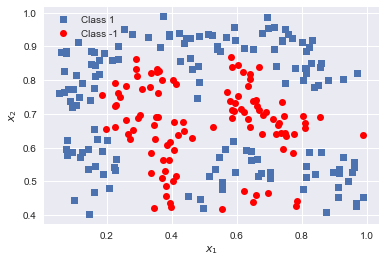

In [4]:
min1=np.min(X_train[:,0])
max1=np.max(X_train[:,0])
min2=np.min(X_train[:,1])
max2=np.max(X_train[:,1])



## Plot Data
index=(Y_train==1).reshape(Y_train.shape[0],)
plt.plot(X_train[index,0],X_train[index,1],'s',label="Class 1")
index=(Y_train==0).reshape(Y_train.shape[0],)
plt.plot(X_train[index,0],X_train[index,1],'ro',label="Class -1")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.rcParams["figure.figsize"] = [8,8]

### ** Question 1 (1 point)** Hold out part of the training data to create a validation. For instance, take the 20% of the data points at random for validation.<a name="id4"></a>

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.20, random_state=1234)

In [6]:
y_train = y_train.reshape([-1,])
y_val = y_val.reshape([-1,])

### ** Question 2 (4 points)** Train a SVM with a linear kernel. Plot the decision boundary and the $\pm 1$-distance to boundary contour levels. <a name="id5"></a>

Use different values of $C$ and analyze the evolution of the number of support vectors as you vary this quantity. Explain the results!

Compute and plot the classification error rate for both training and validation sets as a function of $C$.

Do you think a linear kernel is adequate in this case?

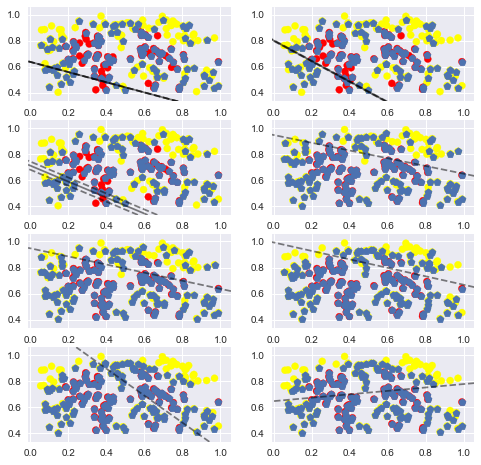

In [7]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score

train_error = np.zeros(8)
val_error = np.zeros(8)
supor_vectors = np.zeros(8)

c = [1E10,1E9,1E8,1E6,1E5,1E3,1E2,1]


for i in range(len(c)):

    model = SVC(kernel='linear', C=c[i])   # k(x1,x2) = x1^T x2
    model.fit(x_train, np.squeeze(y_train))


    train_error[i] = 1- accuracy_score(y_train,model.predict(x_train))
    val_error[i] = 1 - accuracy_score(y_val,model.predict(x_val))
    supor_vectors[i] = model.n_support_[0] + model.n_support_[0]
            
    plt.subplot(4, 2, i+1)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=np.squeeze(y_train), s=50, cmap='autumn')
    plot_svc_decision_function(model,plot_support=True)


plt.rcParams["figure.figsize"] = [8,8]

In the graphs above we can see that almost all the points for all the diferents values of *'C'* are suport vectors. The fix line with the linear kernel cannot separate well the red points from the yellow ones because the problem seems to be too complex, hence we will need to use another kernel.  

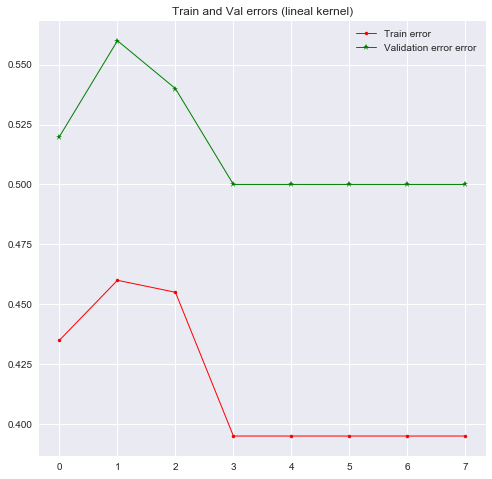

In [8]:
plt.title('Train and Val errors (lineal kernel)')
plt.plot(train_error, "r.-",linewidth=1.0,label='Train error')
plt.plot(val_error,"g*-",linewidth=1.0,label='Validation error error')
plt.legend()

In [9]:
print("The best error ({0:1f}) is obtained with : C= {1:0f} ".format(min(val_error),1E6))

The best error (0.500000) is obtained with : C= 1000000.000000 


The error is too high even for the best values of *C*. In this particular case there is a minimum value of *C* in which we can achive the minimum possible error,  being less restrictive. If we decrese this value we are not going to obtain better solutions, so the best value of *C* obtained is $C= 1000000$.


Afterwards there is a plot in which it is represented the evolution of the number of support vectors for each value of the hyper-parameter *C*. The lowest error match with the highest number of support vectors (as it was expected due to the decrease of the *C* value), so in this case it is better to be less restrictive.

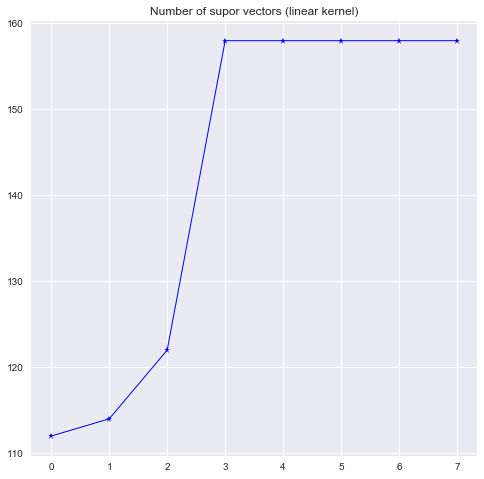

In [10]:
plt.title('Number of supor vectors (linear kernel)')
plt.plot(supor_vectors,"b*-",linewidth=1.0)

### ** Question 3 (5 points)** Train a SVM with a RBF kernel with bandwith $\gamma$. Plot the decision boundary and the $\pm 1$-distance to boundary contour levels. <a name="id6"></a>

Use different values of $(C,\gamma)$ and analyze the evolution of the number of support vectors as you vary these quantities. For instance, fix $\gamma=1$ and vary $C$ and the other way around. Explain the results! Plotting the decision boundary and support vectors will help you to understand what's going on.

Note: check [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) to see how to vary $\gamma$.

For different values of $\gamma$, compute and plot the classification error rate for both training and validation sets as a function of $C$.


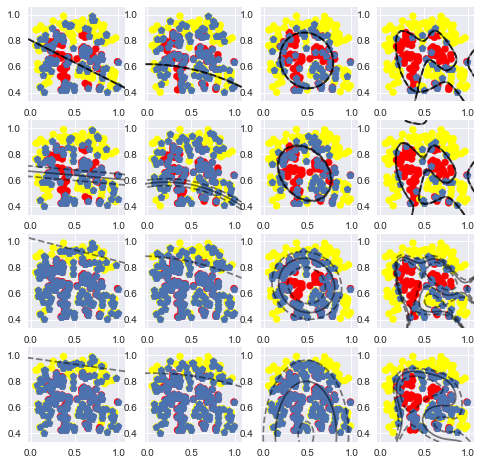

In [11]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score

train_error = np.zeros(16)
val_error = np.zeros(16)
supor_vectors = np.zeros(16)

c = [1E10,1E8,1E6,1E4]
gamma_ = [1E-6,1E-4,1E-2,1]


for i in range(len(c)):
    for j in range(len(gamma_)):

        model = SVC(kernel='rbf', C=c[i],gamma=gamma_[j])   # k(x1,x2) = x1^T x2
        model.fit(x_train, np.squeeze(y_train))


        train_error[i*4+j] = 1 - accuracy_score(y_train,model.predict(x_train))
        val_error[i*4+j] = 1 - accuracy_score(y_val,model.predict(x_val))
        supor_vectors[i*4+j] = model.n_support_[0] + model.n_support_[0]
            
        plt.subplot(4, 4, i*4+j+1)
        plt.scatter(x_train[:, 0], x_train[:, 1], c=np.squeeze(y_train), s=50, cmap='autumn')
        plot_svc_decision_function(model,plot_support=True)


plt.rcParams["figure.figsize"] = [8,8]

With the *'RBF'* kernel we obtain better results. If we set the parameter *$\gamma$* to a high value (1 in this case), we reach a good shape for the decision line (we have to beard in mind that the *$\gamma$* parameter defines how far the influence of a single point in the training set reaches, so the closer to the line the more influence one point will have if this parameter is very high, making the model more flexible and liable to overfit as well). It is also important to notice that in this particular case the value of *C* that works the better is a very high value, or what is the same, a model with very restrictive margins (we do not let the model to make a lot of mistakes or what is the same, to have a lot of support vectors)

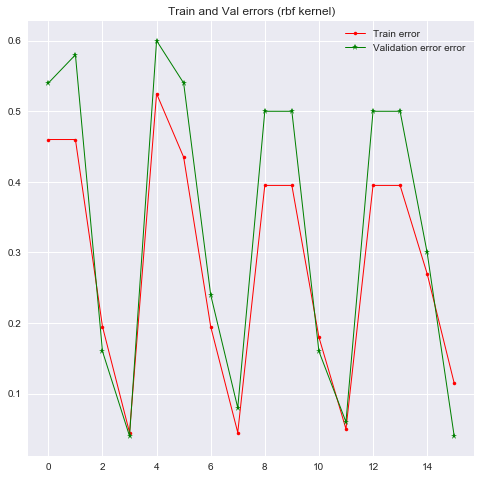

In [33]:
plt.title('Train and Val errors (rbf kernel)')
plt.plot(train_error, "r.-",linewidth=1.0,label='Train error')
plt.plot(val_error,"g*-",linewidth=1.0,label='Validation error error')
plt.legend()

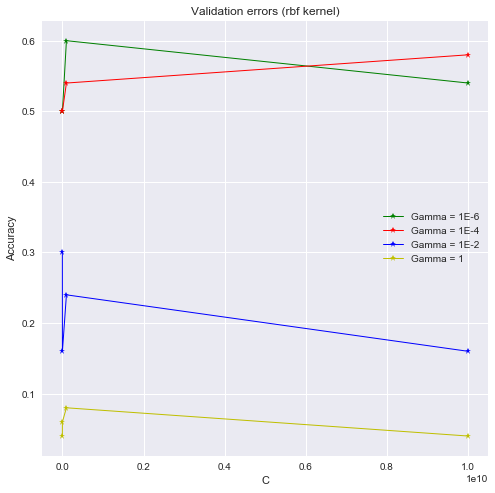

In [34]:
plt.title('Validation errors (rbf kernel)')
plt.plot(c ,val_error[0:len(val_error):4],"g*-",linewidth=1.0,label='Gamma = 1E-6')
plt.plot(c ,val_error[1:len(val_error):4],"r*-",linewidth=1.0,label='Gamma = 1E-4')
plt.plot(c ,val_error[2:len(val_error):4],"b*-",linewidth=1.0,label='Gamma = 1E-2')
plt.plot(c ,val_error[3:len(val_error):4],"y*-",linewidth=1.0,label='Gamma = 1')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
print("The best error ({0:1f}) is obtained with : C= {1:0f} and Gamma={2:2f}".format(min(val_error),1E10,1))

The best error (0.040000) is obtained with : C= 10000000000.000000 and Gamma=1.000000


Above we have the progress of the train and validation errors for different values of *C* and *$\gamma$*. The lower error in validation is 0.04. As this error is very similar to the train error (0.045) in this point we can assume that we do not have a lot of overfitting. 


Below we have the number of suport vectors for each combination of *C* and *$\gamma$*. The best point in terms of accuracy is the same that the best point in terms of number of support vectors (*C*= 10000000000 and $\gamma=1$) which now have sense.

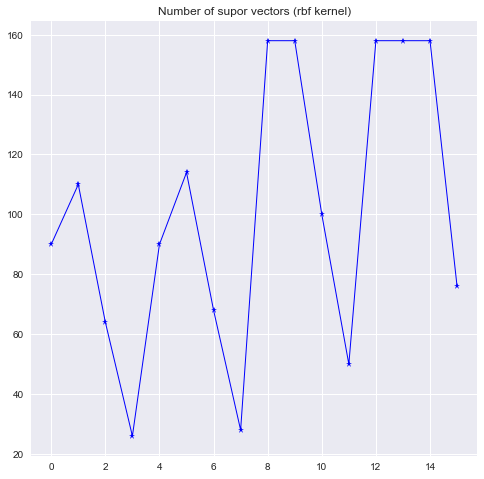

In [31]:
plt.title('Number of supor vectors (rbf kernel)')
plt.plot(supor_vectors,"b*-",linewidth=1.0)

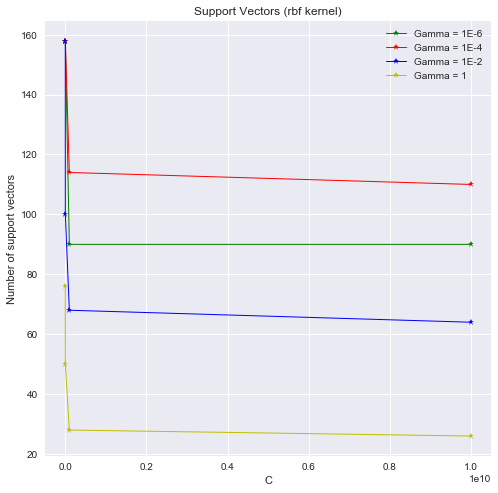

In [36]:
plt.title('Support Vectors (rbf kernel)')
plt.plot(c ,supor_vectors[0:len(val_error):4],"g*-",linewidth=1.0,label='Gamma = 1E-6')
plt.plot(c ,supor_vectors[1:len(val_error):4],"r*-",linewidth=1.0,label='Gamma = 1E-4')
plt.plot(c ,supor_vectors[2:len(val_error):4],"b*-",linewidth=1.0,label='Gamma = 1E-2')
plt.plot(c ,supor_vectors[3:len(val_error):4],"y*-",linewidth=1.0,label='Gamma = 1')
plt.xlabel('C')
plt.ylabel('Number of support vectors')
plt.legend()
plt.show()

In conclusion, the *'RBF'* for this problem is the most apropiate SVM kernel. 